In [120]:
import cv2 as cv
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

%config IPCompleter.greedy=True

In [121]:
#read scanned data from text file

df = pd.read_csv('scanData.txt',delimiter=',')
x = df.values[:,0]
y = df.values[:,1]
#print(x,y)

df = pd.read_csv('scanData.txt',delimiter=',')
angle = df.values[:,0]
#print(angle)
distance = df.values[:,1]



In [122]:
#polar to cartesian converison
cartesian = [(r*math.cos(phi*math.pi/180), r*math.sin(phi*math.pi/180)) for r, phi in zip(distance, angle)]


In [123]:
#shirt to all positive value
x, y = map(list, zip(*cartesian))
x=  np.array(x)
y=  np.array(y)

x+=  x.min()*-1
y+=  y.min()*-1

print(y.min())

data = np.vstack([y, x])


0.0


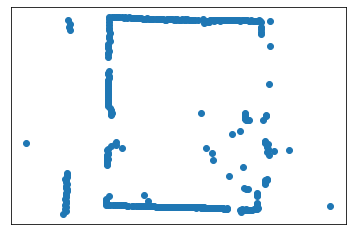

In [128]:
###only for matplotLib

#plt.scatter(y,x, color='yellowgreen', marker='.',label='Inliers')
plt.scatter(y,x)

###remove the axis tag from here
plt.xticks([])
plt.yticks([])


#plt.scatter(y,x)
plt.savefig('floor.png')
plt.show()

In [129]:
### canny edge detection

image = cv.imread('floor.png')
original = image.copy()
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
'''
cv.imshow("gray",gray)
cv.waitKey(1000)
cv.destroyAllWindows()
'''
canny = cv.Canny(gray,100,200)


## creating mask to hide axis

'''
Here's a simple approach:

Convert image to grayscale
Color threshold to isolate green
Find contours and fill in mask
Bitwise-and to get result
https://stackoverflow.com/questions/57940737/how-to-mask-everything-in-an-image-except-for-a-specific-color-inside
'''

lower = np.array([35, 0, 0], dtype="uint8")
upper = np.array([131, 255, 185], dtype="uint8")
mask = cv.inRange(image, lower, upper)

cnts = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cv.fillPoly(mask, cnts, (255,255,255))
result = cv.bitwise_and(original,original,mask=mask)


cv.imshow("result",result)
cv.waitKey(10000)
cv.destroyAllWindows()
###Hough transform

#gray = cv.cvtColor(result,cv.COLOR_BGR2GRAY)
#print(gray)
edges = cv.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

for x1,y1,x2,y2 in lines[0]:
    cv.line(image,(x1,y1),(x2,y2),(0,255,0),2)
#cv.imwrite('houghlines5.jpg',image)


cv.imshow("canny",image)
cv.waitKey(10000)
cv.destroyAllWindows()

In [37]:
###### coverting this into 2d array

#x=x.reshape( 1,-1)

#print(x)
#y=y.reshape(1,-1)
print(x.min, x.max)

# generate coordinates of line
#x = np.arange(-200, 200)

#y = 0.2 * x + 20
data = np.vstack([x, y])
print(data.shape)
print(data)
img = np.zeros([100,100,3],dtype=np.uint8)
cv.imshow("data",data)
cv.waitKey(1000)
cv.destroyAllWindows()

<built-in method min of numpy.ndarray object at 0x7fe84d429120> <built-in method max of numpy.ndarray object at 0x7fe84d429120>
(2, 421)
[[ 3.46879690e+03  3.34920279e+03  3.40675444e+03  3.39895436e+03
   3.39571392e+03  3.45392941e+03  3.42790596e+03  3.42844084e+03
   3.42353003e+03  3.43019348e+03  3.43436500e+03  3.42927137e+03
   3.43653297e+03  3.42370168e+03  3.45076637e+03  3.44496313e+03
   3.43765241e+03  3.44081674e+03  3.44534861e+03  3.44856854e+03
   3.44146495e+03  3.44086944e+03  3.43773002e+03  3.43333969e+03
   3.43505838e+03  3.43646370e+03  3.44005704e+03  3.44427579e+03
   3.44114409e+03  3.42452911e+03  3.43081776e+03  3.43769536e+03
   3.42792494e+03  3.43093217e+03  3.42851695e+03  3.42674441e+03
   3.42692618e+03  3.42953789e+03  3.42584343e+03  3.42278352e+03
   3.41618827e+03  3.41649138e+03  3.43007089e+03  3.42289607e+03
   3.37890492e+03  3.26888670e+03  3.19476771e+03  3.12987231e+03
   3.06827870e+03  3.42162124e+03  2.76324968e+03  1.75738132e+03
   9.

hi:  [[34.         1.5707964]]
hi:  [[36.         1.5707964]]
hi:  [[251.          1.5707964]]
hi:  [[253.          1.5707964]]
hi:  [[53.  0.]]
hi:  [[55.  0.]]
hi:  [[388.   0.]]
hi:  [[390.   0.]]


(array([ 6.5, 14. ]), array([0.73148122, 0.68186159]))


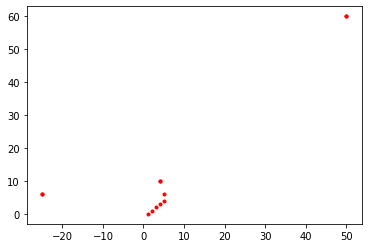

In [300]:
model = LineModelND()
model.estimate(data)
x1= np.arange(100,100)

fig,ax = plt.subplots()

print(model.params)
ax.plot(data[:,0], data[:,1], '.r')
ax.plot(x1, model.predict_y(x1))


In [299]:


ax.plot(x1, model.predict_y(x1), '-b')
mode_robust, inliers = ransac (data, LineModelND, min_samples= 2, 
                               residual_threshold=2,
                               
                               
                               max_trials=1500)

outliers= (inliers== False)
print(data)
print(data[inliers])
x= mode_robust.predict_y(x1)
ax.plot(x1, x, '-y')


[[  1   0]
 [  2   1]
 [  3   2]
 [  4   3]
 [  5   4]
 [  5   6]
 [ 50  60]
 [-25   6]
 [  4  10]
 [ 50  60]
 [-25   6]
 [  4  10]]
[[ 1  0]
 [ 2  1]
 [ 3  2]
 [ 4  3]
 [ 5  4]
 [ 5  6]
 [50 60]
 [50 60]]


In [38]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(data, 'RGB')
img.save('my.png')
img.show()